<a href="https://colab.research.google.com/github/Priyabrat845/Customer-churn-prediction/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**

Process involved in this project:

I - Importing Dataset

II- Data Cleaning

III- Exploratory Data Analysis

IV- Data Preprocessing

V- Model Building and Evaluation

## **Importing libraries**

In [83]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## **Importing data**

In [84]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/telecocustomers.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6810,7758-XKCBS,Male,0,No,No,15,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.7,438.25,Yes
5322,8731-WBBMB,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),81.9,2078.55,No
1711,9964-WBQDJ,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.4,1725.4,No
5931,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
2912,0674-DGMAQ,Male,1,Yes,No,32,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,93.5,2970.8,No


## **Data cleaning**

In [85]:
df.shape

(7043, 21)

In [86]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [87]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

The TotalCharges proved to be string data type. Now we will convert it to numeric data type.

In [88]:
df['TotalCharges']=pd.to_numeric(df.TotalCharges.values,errors='coerce')

In [89]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Lets have a look at the null values in the dataset we have after converting the TotalCharges column from string to numeric data type.

In [90]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 21)

In [131]:
df.isnull().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
InternetService_0                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
Contract_Month-to-month                     0
Contract_One year                 

From the above we can see that the TotalCharges column contains the null value.

In [136]:
# Removing the rows having null for TotalCharges column.
df=df[df['TotalCharges'].notna()]
df.shape

(7032, 27)

In [137]:
df.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_0                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [92]:
# Removing the CustomerID column.
df.drop('customerID',axis=1,inplace=True)

In [93]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
# Creating function to look at the unique values of each column.
def unique_values(dataframe):
  for column in dataframe:
    if dataframe[column].dtype=='object':
      print(f'{column}: {dataframe[column].unique()}')

In [95]:
unique_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


We can see that some of the columns have no internet service or no phone service, that can be replaced with a simple No.

In [96]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [97]:
unique_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [98]:
# Converting Yes to 1 and No to 0.
df.replace('Yes',1,inplace=True)
df.replace('No',0,inplace=True)

In [99]:
unique_values(df)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [100]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64

In [101]:
# converting genders: Male to 0 and Female to 1.
df['gender'].replace({'Male':0,'Female':1},inplace=True)

In [102]:
df['gender'].value_counts()

0    3555
1    3488
Name: gender, dtype: int64

In [103]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [104]:
#df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])

## **Exploratory data analysis**

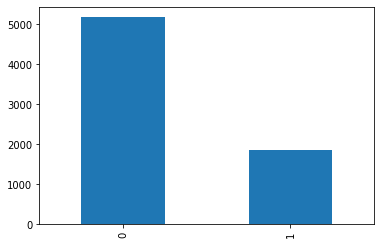

In [105]:
df['Churn'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


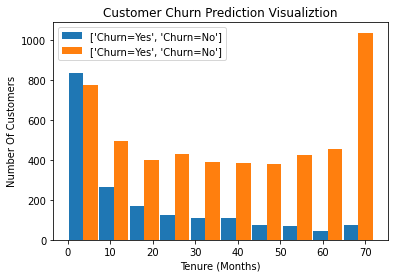

In [106]:
# Plotting the side by side histogram for Customer Leaving and Not Leaving w.r.t their Tenure.
tenure_churn_no = df[df.Churn==0].tenure
tenure_churn_yes = df[df.Churn==1].tenure
plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=0.95,Label=['Churn=Yes','Churn=No'])
plt.xlabel("Tenure (Months)")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()

In [107]:
import seaborn as sns

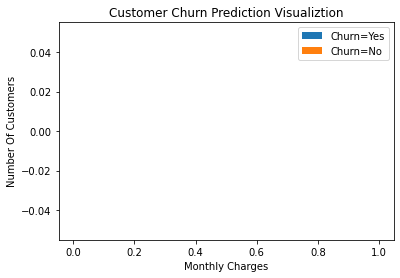

In [138]:
churn_no=df[df['Churn']=='No']
churn_yes=df[df['Churn']=='Yes']
mc_churn_no=churn_no['MonthlyCharges']
mc_churn_yes=churn_yes['MonthlyCharges']
      
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95,label=['Churn=Yes','Churn=No'])
plt.legend()

In [109]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


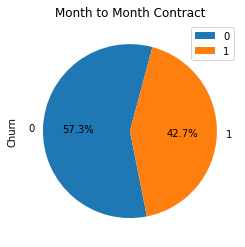

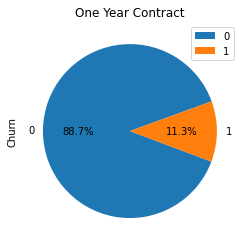

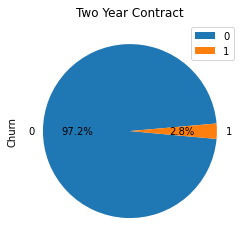

In [110]:
pie_Contract_m2m = pd.DataFrame(df[df['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(df[df['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(df[df['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

In [111]:
# One hot encoding for categorical columns.
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])


In [112]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,1,0,0,0,0,1,0


In [113]:
# Scaling the columns Tenure, Monthly Charges and Total Charges columns in the range 0 to 1.
columns_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])

In [114]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,0,1,1,0,0,0,0,1,0


## **Model building**

In [115]:
from sklearn.model_selection import train_test_split

In [140]:
x=df.drop('Churn',axis='columns')
y=df['Churn']

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [118]:
print('Size of x training set data:',x_train.shape)
print('Size of y training set data:',y_train.shape)
print('Size of x test set data:',x_test.shape)
print('Size of y test set data:',y_test.shape)


Size of x training set data: (5634, 26)
Size of y training set data: (5634,)
Size of x test set data: (1409, 26)
Size of y test set data: (1409,)


In [119]:
import tensorflow as tf
from tensorflow import keras

In [143]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [144]:
# Building the ANN Model in Keras.
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

mdl = model.fit(x_train, y_train, epochs=100, )






Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4925 - accuracy: 0.7497
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.7913
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.7996
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8027
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8066
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8098
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8089
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8098
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4028 - accura

In [145]:
# Showing model details.
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 26)                702       
_________________________________________________________________
dense_13 (Dense)             (None, 15)                405       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 16        
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


In [146]:
ypred=model.predict(x_test)

In [147]:
ypred[:5]

array([[0.449479  ],
       [0.42323834],
       [0.00745118],
       [0.85457134],
       [0.45052928]], dtype=float32)

In [149]:
y_pred=[]
for i in ypred:
  if i>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [151]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [152]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [157]:
count=(y_pred!=y_test).sum()
count

319

From the above we can see that, the model has wrongly predicted 319 observations.

In [158]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       999
           1       0.63      0.53      0.57       408

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.76      0.77      0.77      1407



Text(69.0, 0.5, 'Actual Values')

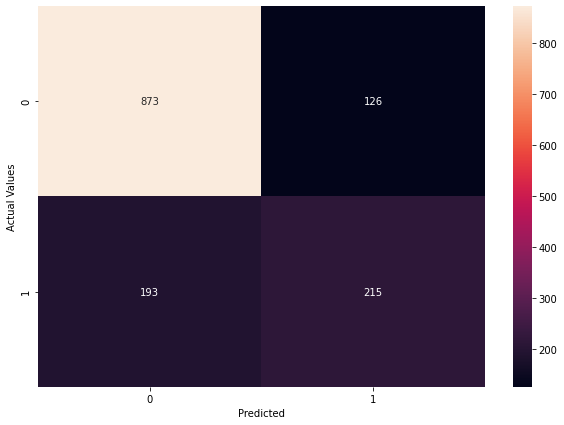

In [159]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual Values')

In [160]:
tp = cm[0,0]
fn = cm[0,1]
fp = cm[1,0]
tn = cm[1,1]
total_pred = tp+fn+fp+tn

In [161]:
total_pred

1407

In [163]:
# Accuracy of the model.
accuracy=round((tp+tn)/(total_pred),2)
accuracy

0.77

In [167]:
# Precision for Not Churn.
precision_not_churn=round((tp)/(tp+fp),2)
precision_not_churn

0.82

In [168]:
# Recall for Not Churn.
recall_not_churn=round((tp)/(tp+fn),2)
recall_not_churn

0.87

In [169]:
# Precision for Churn.
precision_churn=round((tn)/(tn+fn),2)
precision_churn

0.63

In [170]:
# Recall for Churn.
recall_churn=round((tn)/(fp+tn),2)
recall_churn

0.53

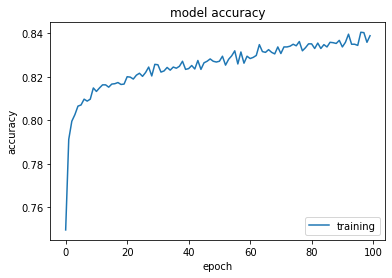

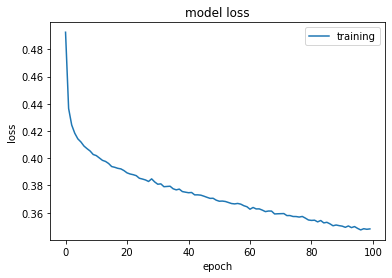

In [171]:
val_acc = [1]
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

# summarize history for accuracy
plot_accuracy(mdl)

# summarize history for loss
plot_loss(mdl)



## **Conclusion**

The pre-processing of dataset can be done more to get more accurate results.